# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250705'
object = 'V462Lup'
channel = '3'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:57:57.572000,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:58:48.692076,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:59:39.812151,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:00:30.932228,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:01:22.052303,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:01.276000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,12,L4,None,True
8857,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:43.701000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,13,L4,None,True
8858,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:00:26.279000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,14,L4,None,True
8859,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:01:08.933000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs3/20250705_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     170   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   8R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   8R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   8R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   8R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   8R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

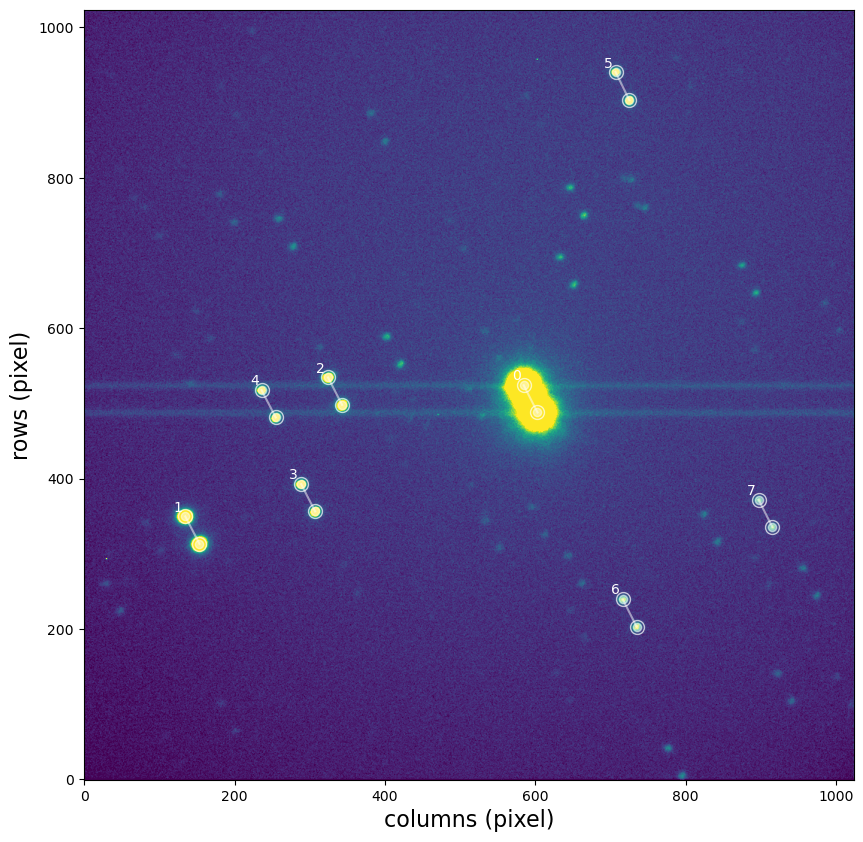

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.004554,-40.140143,602.887226,487.925454,7.849503,7.849503,-16.538553,0.001292,-14.543604,0.000227,10,0
1,1,227.059743,-40.157935,153.340241,313.283447,8.623909,8.623909,-13.029112,0.013759,-14.534651,0.000140,10,0
2,2,227.037008,-40.139897,343.005060,498.055685,8.143415,8.143415,-11.464282,0.053817,-14.537917,0.000153,10,0
3,3,227.040929,-40.153492,307.180061,356.323152,8.356726,8.356726,-11.045855,0.078363,-14.536069,0.000131,10,0
4,4,227.047896,-40.141748,254.797994,481.282755,8.224004,8.224004,-10.669409,0.110307,-14.536758,0.000151,10,0
5,5,226.991146,-40.100539,725.023719,903.184904,7.211463,7.211463,-10.563459,0.121483,-14.537751,0.000132,10,0
6,6,226.987162,-40.166878,734.628324,203.166265,8.458089,8.458089,-9.830382,0.237071,-14.535912,0.000136,10,0
7,7,226.965304,-40.153721,915.140435,335.719049,7.655281,7.655281,-9.385073,0.356598,-14.536496,0.000130,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

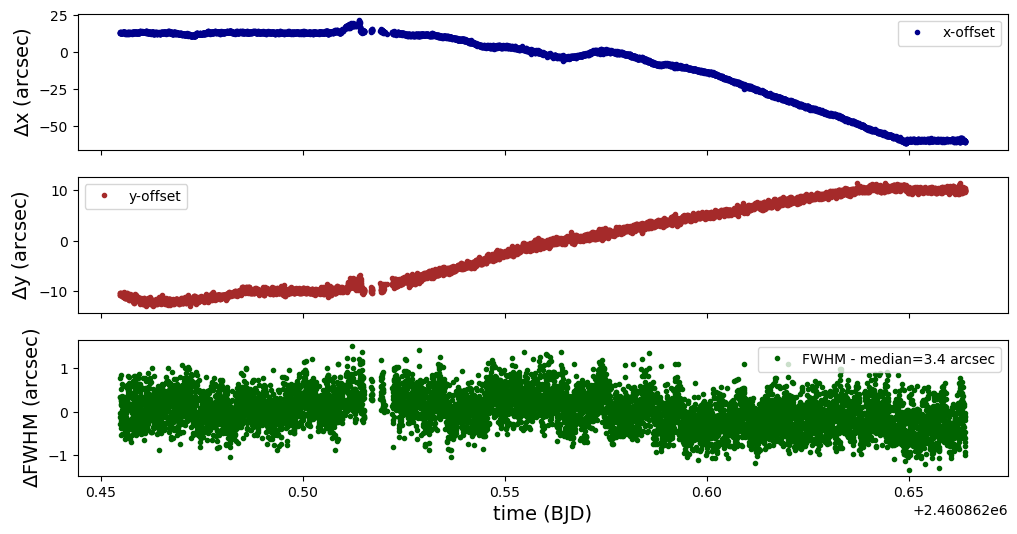

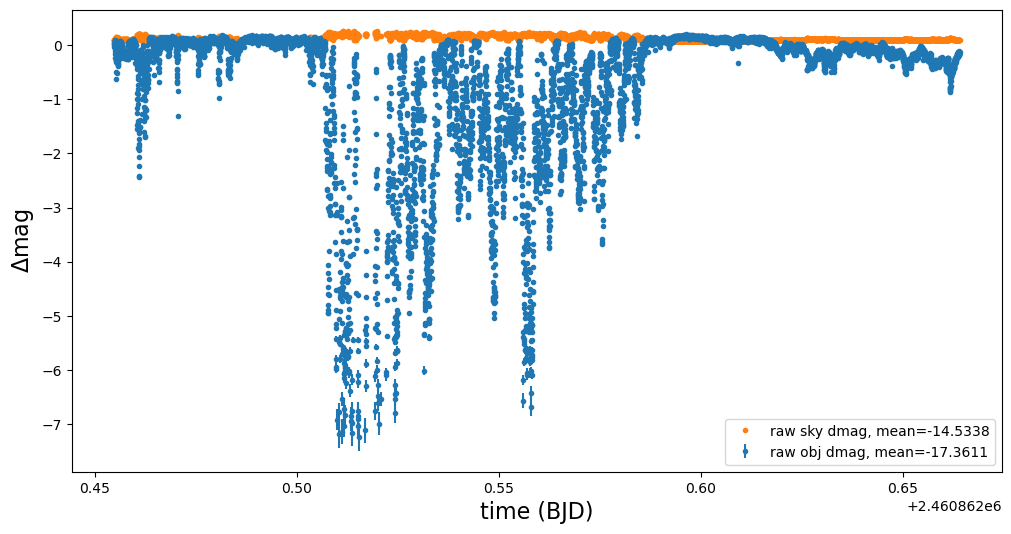

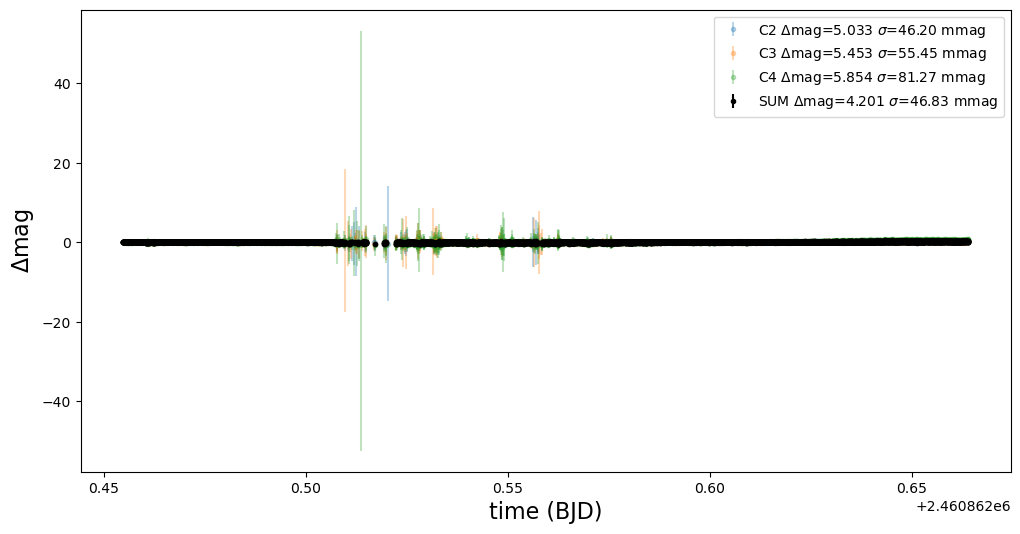

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
  2460862.45478793 593.7380819458579 ... 0.0017692095299359778
2460862.4548032074 594.2380819458579 ...   0.02373466408163516
2460862.4548368966 594.4880819458579 ... 0.0033113600986887093
 2460862.454852174 594.2380819458579 ...  0.008521912302676071
2460862.4548844513 594.7380819458579 ...  0.011743049051920806
2460862.4548997288 594.7380819458579 ...    0.0180142940698218
 2460862.454931936 595.4880819458579 ...  -0.00912792757340597
               ...               ... ...                   ...
 2460862.663882298 374.4880819458579 ...    0.1793532032985503
2460862.6639156635 373.9880819458579 ...   0.11600005546223713
 2460862.663930941 374.7380819458579 ...     0.283285096924736
 2460862.663967234 374.7380819458579 ...   0.29853957654340846
2460862.6639825115 372.7380819458579 ...    0.1798275640046043
 2460862.664013272 373.7380819458579 ...    0.260994892

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs3/20250705_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   50409   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU  67258   8R x 33623C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE8394,EFE8394,FO8395,EFO8395,FE8395,EFE8395,FO8396,EFO8396,FE8396,EFE8396
0,2.0,10.0,0.0,227.004554,-40.140143,584.588937,524.072701,602.887226,487.925454,7.166953,...,4.466394e+06,5107.753470,3.975204e+06,4864.255565,4.364458e+06,5058.357944,4.102746e+06,4927.904481,4.518536e+06,5133.355757
1,2.0,10.0,1.0,227.059743,-40.157935,134.472978,349.734143,153.340241,313.283447,7.645832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,10.0,2.0,227.037008,-40.139897,324.347346,534.468059,343.005060,498.055685,7.088322,...,4.148087e+04,1965.770487,3.486010e+04,1956.420262,4.207623e+04,1964.293429,2.778711e+04,1947.002347,3.514317e+04,1956.478788
3,2.0,10.0,3.0,227.040929,-40.153492,288.604366,392.624828,307.180061,356.323152,7.170618,...,2.777450e+04,1944.230194,1.789063e+04,1930.929971,2.212900e+04,1934.480039,1.520941e+04,1929.769262,1.924939e+04,1932.603583
4,2.0,10.0,4.0,227.047896,-40.141748,235.889800,517.694187,254.797994,481.282755,7.183757,...,1.463216e+04,1928.171487,8.696687e+03,1919.455109,1.119472e+04,1924.831807,8.285266e+03,1917.907594,1.069687e+04,1925.201559
5,2.0,10.0,5.0,226.991146,-40.100539,706.650261,940.823555,725.023719,903.184904,6.819851,...,2.152257e+04,1940.410099,1.667828e+04,1935.147920,2.073407e+04,1939.017007,1.675377e+04,1936.096852,2.150723e+04,1942.357021
6,2.0,10.0,6.0,226.987162,-40.166878,716.287533,239.325362,734.628324,203.166265,7.274082,...,1.050706e+04,1921.731814,1.001689e+04,1924.796826,1.186023e+04,1927.045070,8.707587e+03,1922.120727,1.061994e+04,1924.173112
7,2.0,10.0,7.0,226.965304,-40.153721,896.904160,371.879810,915.140435,335.719049,7.405600,...,7.843281e+03,1923.189612,5.211481e+03,1916.446257,6.254165e+03,1921.056952,6.146037e+03,1919.781517,6.759278e+03,1921.877634


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE8394', 'EFE8394', 'FO8395', 'EFO8395', 'FE8395', 'EFE8395', 'FO8396',
       'EFO8396', 'FE8396', 'EFE8396'],
      dtype='object', length=33623)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-10 15:31:17,846 astropop - INFO - Normalization disabled.  [__init__]


2025-10-10 15:31:17,846 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-10 15:31:18,272 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-10 15:31:18,272 | INFO | Source index: i=0 


2025-10-10 15:31:18,273 root - INFO - Source RA=227.0045542224973 Dec=-40.14014312554844 mag=-27.09042+-0.00001  [pipeline_lib]


2025-10-10 15:31:18,273 | INFO | Source RA=227.0045542224973 Dec=-40.14014312554844 mag=-27.09042+-0.00001


2025-10-10 15:31:18,275 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-10 15:31:18,275 | INFO | Best aperture radius: 20.0 pixels


2025-10-10 15:31:18,276 root - INFO - Polarization in Q: -0.00119+-0.00003  [pipeline_lib]


2025-10-10 15:31:18,276 | INFO | Polarization in Q: -0.00119+-0.00003


2025-10-10 15:31:18,278 root - INFO - Polarization in U: -0.00050+-0.00005  [pipeline_lib]


2025-10-10 15:31:18,278 | INFO | Polarization in U: -0.00050+-0.00005


2025-10-10 15:31:18,280 root - INFO - Polarization in V: -0.00001+-0.00003  [pipeline_lib]


2025-10-10 15:31:18,280 | INFO | Polarization in V: -0.00001+-0.00003


2025-10-10 15:31:18,281 root - INFO - Total linear polarization p: 0.00129+-0.00003  [pipeline_lib]


2025-10-10 15:31:18,281 | INFO | Total linear polarization p: 0.00129+-0.00003


2025-10-10 15:31:18,281 root - INFO - Angle of polarization theta: 101.4+-0.7 deg  [pipeline_lib]


2025-10-10 15:31:18,281 | INFO | Angle of polarization theta: 101.4+-0.7 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-10 15:31:18,283 root - INFO - Free constant k: 0.9078415981394394+-0.0  [pipeline_lib]


2025-10-10 15:31:18,283 | INFO | Free constant k: 0.9078415981394394+-0.0


2025-10-10 15:31:18,287 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-10-10 15:31:18,287 | INFO | Zero of polarization: 27.2+-0.0


2025-10-10 15:31:18,287 root - INFO - RMS of zi residuals: 0.010900021240718085  [pipeline_lib]


2025-10-10 15:31:18,287 | INFO | RMS of zi residuals: 0.010900021240718085


2025-10-10 15:31:18,288 root - INFO - Reduced chi-square (n=8396.0, DOF=8393.0): 2.63  [pipeline_lib]


2025-10-10 15:31:18,288 | INFO | Reduced chi-square (n=8396.0, DOF=8393.0): 2.63


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-10 15:31:18,612 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:31:18,612 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:31:18,620 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:31:18,620 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:31:18,902 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:31:18,902 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:31:18,908 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:31:18,908 | INFO | Substituting symbol \perp from STIXGeneral


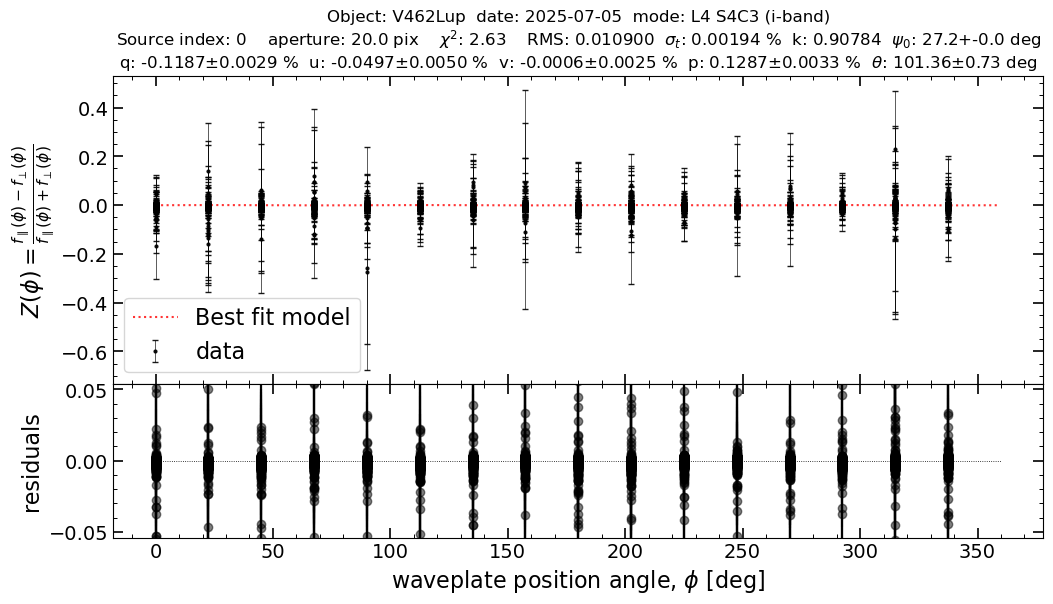

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs3/20250705_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 8397
MAG : -27.09042+-0.00001
RA : 227.0045542224973
DEC : -40.14014312554844
FWHM : 7.1669528212646725
X1 : 584.5889373949574
Y1 : 524.0727009267771
X2 : 602.8872264967584
Y2 : 487.92545357573107
WAVEPLATE_ANGLES : [ 0.   0.  22.5 ...  0.  22.5 22.5]
ZI : [-0.0013+-0.0009, -0.0018+-0.0009, -0.0007+-0.0008, ..., 0.000+-0.001,
 0.001+-0.001, 0.000+-0.001]
FO : [4997000+-6000, 5119000+-6000, 5215000+-6000, ..., 4298000+-6000,
 4224000+-6000, 4339000+-6000]
FE : [5518000+-7000, 5659000+-7000, 5752000+-7000, ..., 4733000+-6000,
 4639000+-6000, 4778000+-6000]
OBSERVED_MODEL : [-6.33326162e-04 -6.33326162e-04  5.39002829e-05 ... -6.33326162e-04
  5.39002829e-05  5.39002829e-05]
Q : -0.00119+-0.00003
U : -0.00050+-0.00005
V : -0.00001+-0.00003
P : 0.00

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.129+-0.003 %  Angle of polarization: 101.4+-0.7 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

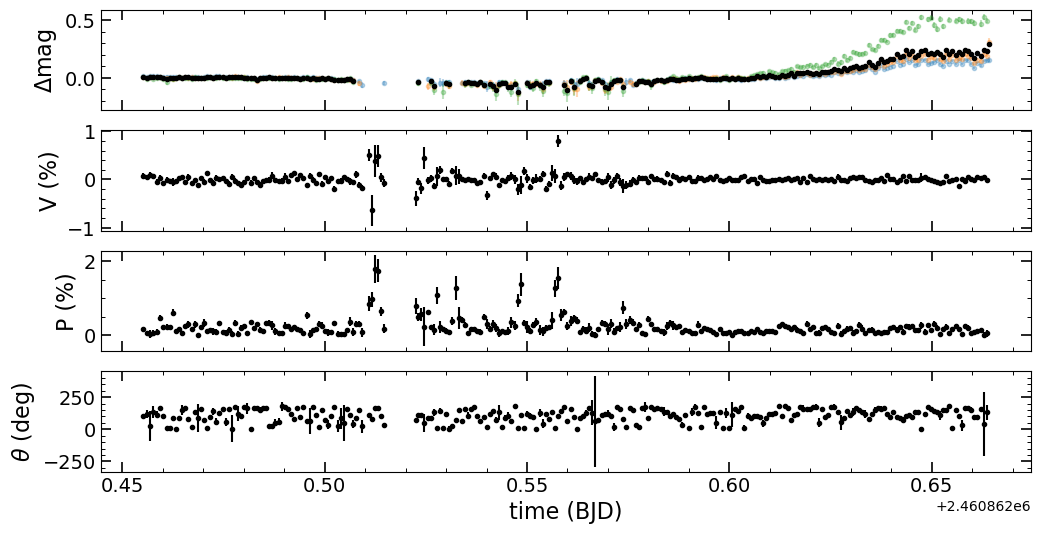

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.01299124611882263,0.0064837158266036095,0.008305323931633524,0.009405469127257905,0.004301640548497687,0.013435740138164265,2460862.455157634,584.5889373949574,524.0727009267771,602.8872264967584,487.92545357573107,7.326437378804464,-21.10780166537184,0.00015829404127543745,-16.897588388995935,0.017633642915566825,0.008283181661280281,0.0016084783090958646,0.0006281500514848826,99.8326639635582,11.168998282958464
0.0047501006209351715,0.006376971280066301,0.0012726795076289932,0.009256608504777684,-0.006909764926179562,0.013177376445056076,2460862.4560108576,585.8389373949574,523.0727009267771,604.1372264967584,486.92545357573107,7.048257888075496,-21.116847882782487,0.0001574765042442085,-16.915149194359124,0.01731818169277782,-0.0002314062912631698,0.000567234346410578,0.0006260738720470781,117.56442497360555,31.566693473081486
0.014101678881761615,0.0060735738191951445,0.005314253162707061,0.008774162249398013,0.004244845736245395,0.012560401342278923,2460862.4567829585,583.5889373949574,523.0727009267771,601.8872264967584,486.92545357573107,7.643331156111474,-21.170990427959715,0.00015285050305573227,-16.961222094162956,0.016479314735942236,0.007838239082133214,0.00023578684609702443,0.00098921411677921,24.727355074027756,119.98771012121544
0.01460444765598723,0.006643647315696661,0.0054690802001537975,0.009603230149843678,-0.006589136207471924,0.013618393216596436,2460862.4577252963,585.8389373949574,523.0727009267771,604.1372264967584,486.92545357573107,7.052425526376779,-21.10837948322657,0.00015879585633508348,-16.900725548189243,0.01793725353548035,0.00572384032270179,0.0004992582044248126,0.0008160251423708672,135.05602462587495,46.74599008081301
0.013469774962739933,0.0055380644924382496,0.0064749359639204584,0.008005728943079646,-0.002125716441273795,0.01137393649506913,2460862.45866286,584.3389373949574,521.3227009267771,602.6372264967584,485.17545357573107,7.473947122738403,-21.26669067497233,0.00014524138361892,-17.058253725665566,0.014968800902135992,0.006506854592139177,0.0007934683358885748,0.0007592906842110753,112.34163775519748,27.368090932221204
0.007585277321041417,0.0056094662777601756,0.007603400059633003,0.008163391725278876,0.006781779502777141,0.011683967177743589,2460862.459429371,585.3389373949574,520.8227009267771,603.6372264967584,484.67545357573107,7.44991016194485,-21.24750019717988,0.00014674543904488713,-17.039472846130256,0.015315272205241025,0.006097256334996359,0.004680525870655362,0.000820771906747832,164.08134158192425,5.015264776156697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.12039960097000701,0.00815333217433457,0.17715289440728732,0.012533514302573559,0.49150389818644946,0.023964626786580637,2460862.6597142564,367.5889373949574,586.3227009267771,385.88722649675844,550.1754535757311,6.1494663948028645,-20.952351828589116,0.00017166812930040432,-16.541328122922643,0.028245012542006436,0.20909361095184664,0.0006225884322294107,0.0004960527506022045,152.75297383060447,22.787298852342634
0.08425972142609872,0.008394009647718744,0.12730770250174217,0.012745055615308568,0.479007954466919,0.025231988795012487,2460862.660483463,367.8389373949574,586.3227009267771,386.13722649675844,550.1754535757311,6.03990198711905,-20.885658047291983,0.00017799756789881098,-16.511306451041158,0.029486506231705477,0.17242150153619917,0.0009467191309972652,0.00039879599160516746,98.79362245982415,12.04746475112769


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)